In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv('cardio_data.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [5]:
df.drop('age', axis=1, inplace=True)
df.drop('bp_category_encoded', axis=1, inplace=True)

In [6]:
df.isnull().sum()

id             0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [7]:
df.shape

(68205, 15)

Visualisation

Bar Graph

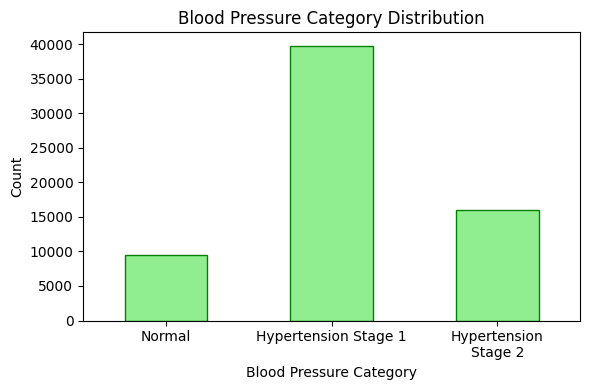

In [8]:
category_counts = df['bp_category'].value_counts()

#Reorder the categories: 'Normal', 'Hypertension Stage 1', 'Hypertension Stage 2'
ordered_categories = ['Normal', 'Hypertension Stage 1', 'Hypertension Stage 2']
category_counts = category_counts[ordered_categories]

#Plotting the bar graph
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color='lightgreen', edgecolor='green')

#Title and labels
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')

#Shorten the x-axis labels to split "Hypertension Stage 2" into two lines
plt.xticks(ticks=range(3), labels=['Normal', 'Hypertension Stage 1', 'Hypertension\nStage 2'], rotation=0)

#Adjust layout to prevent label overlap
plt.tight_layout()

#Show the plot
plt.show()

Histogram

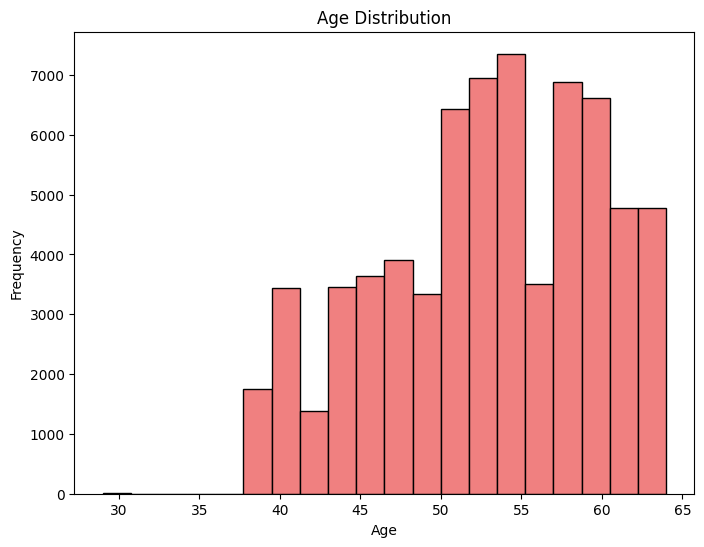

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['age_years'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Pie Chart

In [10]:
cardio_counts = df['cardio'].value_counts()
print(cardio_counts)

cardio
0    34533
1    33672
Name: count, dtype: int64


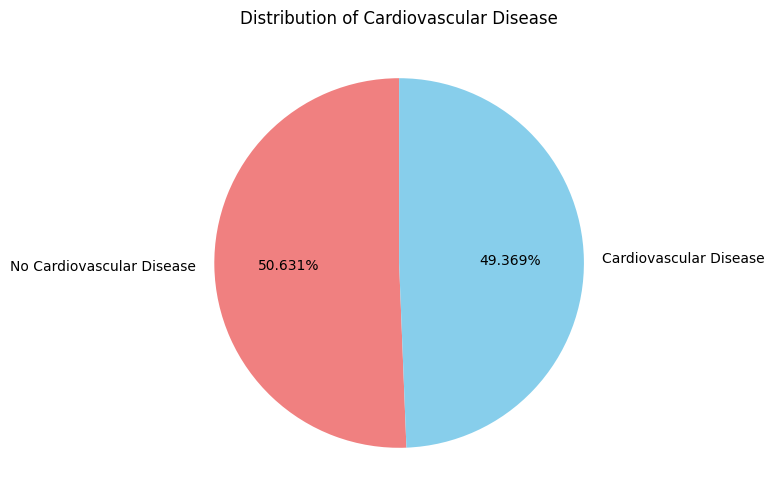

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(cardio_counts, labels=['No Cardiovascular Disease', 'Cardiovascular Disease'], autopct='%1.3f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Cardiovascular Disease')
plt.show()

Scatter Plot

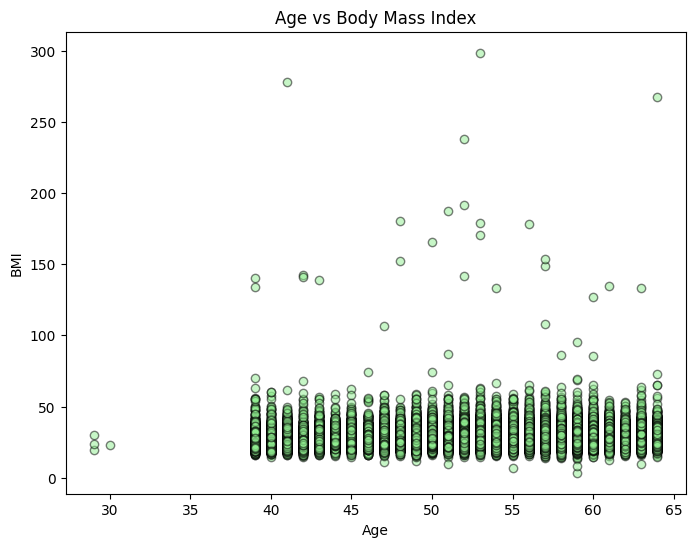

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age_years'], df['bmi'], color='lightgreen',edgecolor = 'k', alpha=0.5)
plt.title('Age vs Body Mass Index')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

BoxPlot

<Figure size 800x600 with 0 Axes>

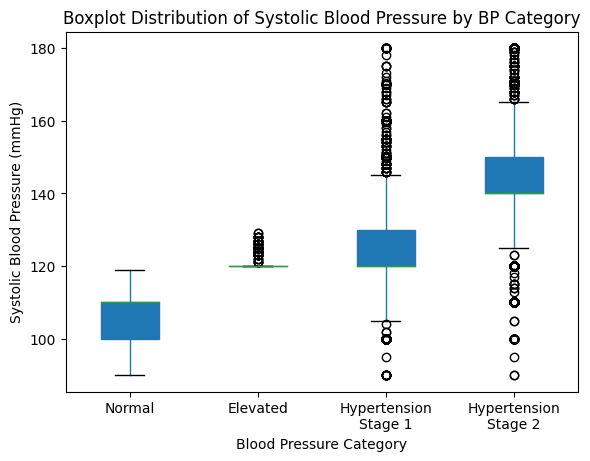

In [13]:
category_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
df_filtered = df.copy()
df_filtered['bp_category'] = pd.Categorical(df_filtered['bp_category'], categories=category_order, ordered=True)
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='ap_hi', by='bp_category', grid=False, patch_artist=True)
plt.suptitle('')
plt.title('Boxplot Distribution of Systolic Blood Pressure by BP Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Systolic Blood Pressure (mmHg)')
positions = [1, 2, 3, 4]
plt.xticks(positions, ['Normal', 'Elevated', 'Hypertension\nStage 1', 'Hypertension\nStage 2'])
plt.show()


In [14]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)

Column: gender
[2 1]
----------------------------------------
Column: cholesterol
[1 3 2]
----------------------------------------
Column: gluc
[1 2 3]
----------------------------------------
Column: smoke
[0 1]
----------------------------------------
Column: alco
[0 1]
----------------------------------------
Column: active
[1 0]
----------------------------------------
Column: cardio
[0 1]
----------------------------------------
Column: bp_category
['Hypertension Stage 1' 'Hypertension Stage 2' 'Normal' 'Elevated']
----------------------------------------


Model Training

In [15]:
#Transformed the objects
encoder = LabelEncoder()
df['bp_category'] = encoder.fit_transform(df['bp_category'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68205 non-null  int64  
 1   gender       68205 non-null  int64  
 2   height       68205 non-null  int64  
 3   weight       68205 non-null  float64
 4   ap_hi        68205 non-null  int64  
 5   ap_lo        68205 non-null  int64  
 6   cholesterol  68205 non-null  int64  
 7   gluc         68205 non-null  int64  
 8   smoke        68205 non-null  int64  
 9   alco         68205 non-null  int64  
 10  active       68205 non-null  int64  
 11  cardio       68205 non-null  int64  
 12  age_years    68205 non-null  int64  
 13  bmi          68205 non-null  float64
 14  bp_category  68205 non-null  int32  
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.5 MB


In [17]:
data = ['cholesterol', 'smoke', 'age_years', 'bp_category', 'ap_hi', 'ap_lo', 'weight', 'height', ]
X = df[data]
y = df['cardio']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.19363300353175955
R^2 Score: 0.22513447746234672


Logistic Regression

In [22]:
log_reg = LogisticRegression(max_iter=6000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=6000)

In [23]:
y_pred = log_reg.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy} \n")
print(" \nConfusion Matrix: ")
print(conf_matrix)
print("\nClassification Report: ")
print(class_report)

Accuracy: 0.7245803093614838 

 
Confusion Matrix: 
[[5602 1360]
 [2397 4282]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6962
           1       0.76      0.64      0.70      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.72      0.72     13641
weighted avg       0.73      0.72      0.72     13641



KNN

In [25]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6687926105124258
Confusion Matrix:
[[4767 2195]
 [2323 4356]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      6962
           1       0.66      0.65      0.66      6679

    accuracy                           0.67     13641
   macro avg       0.67      0.67      0.67     13641
weighted avg       0.67      0.67      0.67     13641



SVM (Linear)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy : " , accuracy)
print("Confusion Matrix : \n" , conf_matrix)
print("Classification Reoprt : \n" , class_report)

Accuracy :  0.7187156366835276
Confusion Matrix : 
 [[5913 1049]
 [2788 3891]]
Classification Reoprt : 
               precision    recall  f1-score   support

           0       0.68      0.85      0.76      6962
           1       0.79      0.58      0.67      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.72      0.71     13641
weighted avg       0.73      0.72      0.71     13641



SVM(Non Linear)

In [31]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy : " , accuracy)
print("Confusion Matrix : \n" , conf_matrix)
print("Classification Reoprt : \n" , class_report)

Accuracy :  0.7157099919360751
Confusion Matrix : 
 [[5838 1124]
 [2754 3925]]
Classification Reoprt : 
               precision    recall  f1-score   support

           0       0.68      0.84      0.75      6962
           1       0.78      0.59      0.67      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.71      0.71     13641
weighted avg       0.73      0.72      0.71     13641



Decision Tree

In [33]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy : " , accuracy)
print("Confusion Matrix : \n" , conf_matrix)
print("Classification Reoprt : \n" , class_report)

Accuracy :  0.6292060699362216
Confusion Matrix : 
 [[4599 2363]
 [2695 3984]]
Classification Reoprt : 
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      6962
           1       0.63      0.60      0.61      6679

    accuracy                           0.63     13641
   macro avg       0.63      0.63      0.63     13641
weighted avg       0.63      0.63      0.63     13641



Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6894655817022213
Confusion Matrix:
[[4882 2080]
 [2156 4523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6962
           1       0.68      0.68      0.68      6679

    accuracy                           0.69     13641
   macro avg       0.69      0.69      0.69     13641
weighted avg       0.69      0.69      0.69     13641



Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7187889450920021
Confusion Matrix:
[[5614 1348]
 [2488 4191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6962
           1       0.76      0.63      0.69      6679

    accuracy                           0.72     13641
   macro avg       0.72      0.72      0.72     13641
weighted avg       0.72      0.72      0.72     13641



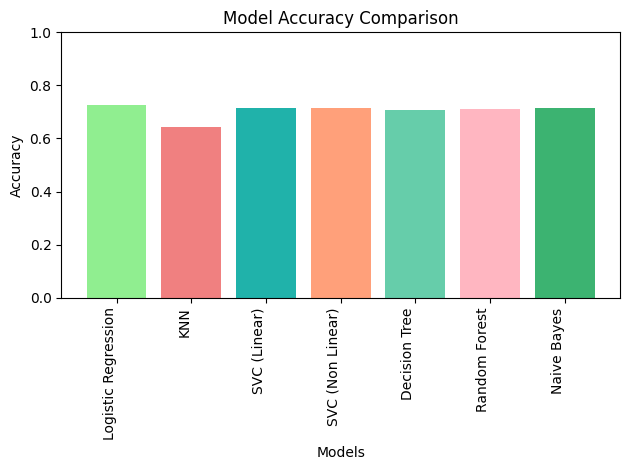

In [40]:
accuracy_scores = {
    'Logistic Regression': 0.7250934682208049,  
    'KNN': 0.6448207609412799,
    'SVC (Linear)': 0.7138772817242137,  
    'SVC (Non Linear)': 0.714243823766586,
    'Decision Tree': 0.7070595997360898, 
    'Random Forest': 0.711311487427608, 
    'Naive Bayes': 0.7160765339784473
}

colors = ['lightgreen', 'lightcoral', 'lightseagreen', 'lightsalmon', 'mediumaquamarine', 'lightpink', 'mediumseagreen']

plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) 
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()


Deployment

In [41]:
import joblib
joblib.dump(log_reg, 'logistic_model.joblib')

['logistic_model.joblib']

In [42]:
ls logistic_model.joblib

 Volume in drive D is New Volume
 Volume Serial Number is 327D-AC23

 Directory of D:\IBM\Project

25-03-2025  10:50 PM             1,327 logistic_model.joblib
               1 File(s)          1,327 bytes
               0 Dir(s)  38,018,158,592 bytes free
